<a href="https://colab.research.google.com/github/Sharon-Liu97/Healthy-Home-Prediction-Map-Visualization/blob/main/Healthy_Home_Prediction_%26_Map_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Healthy Home Prediction & Map Visalization

# 1.Set Environment & Libraries

In [ ]:
# Set an environment for geopandas & other geo-related libraries 

%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

# Geo-related libraries
!pip install geopandas
!pip install osmnx
!pip install contextily
!pip install folium
!pip install plotly_express
!pip install geofeather

# Others
!pip install matplotlib==3.1.3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-06knwr63
  Running command git clone -q git://git

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


CPU times: user 1.28 s, sys: 488 ms, total: 1.77 s
Wall time: 2min 49s


In [ ]:
# Data manipulation libraries
import os
import pandas as pd
import numpy as np

# Geo-related libraries
import geopandas as gpd
import osmnx as ox
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import contextily as ctx
import geofeather
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from shapely import wkt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Timer
from tqdm import tqdm, tqdm_notebook


# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model support functions
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler 
from pprint import pprint
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2.Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Laioffer/csv_files/

/content/drive/MyDrive/Laioffer/csv_files


In [ ]:
# Read air pollutant & health info
df_1 = pd.read_csv("Home_n_Map.csv")
df_1.head(5)

NO value  NO2 value  PM2p5 value                                geometry  \
0  23.390071  17.539762    17.612700        POINT (-122.3225938 37.80678062)   
1  19.700000  19.956750    15.946719          POINT (-122.32231 37.80614989)   
2  23.611111  23.967768    16.210698        POINT (-122.3223008 37.80642014)   
3  15.714285  18.435184    15.561862  POINT (-122.3222988 37.80587979999999)   
4  27.108695  25.797037    17.120884        POINT (-122.3222671 37.80668898)   

   road_type        zone                                     tract_name  \
0   tertiary  industrial  Census Tract 9819, Alameda County, California   
1  secondary  industrial  Census Tract 9819, Alameda County, California   
2  secondary  industrial  Census Tract 9819, Alameda County, California   
3  secondary  industrial  Census Tract 9819, Alameda County, California   
4  secondary  industrial  Census Tract 9819, Alameda County, California   

        GEOID  state  county   pop_den      wind       temp   Longitude  \
0  6001981900      6       1  8.336845  4.133333  14.950001 -122.322594   
1  6001981900      6       1  8.336845  4.133333  14.950001 -122.322310   
2  6001981900      6       1  8.336845  4.133333  14.950001 -122.322301   
3  6001981900      6       1  8.336845  4.133333  14.950001 -122.322299   
4  6001981900      6       1  8.336845  4.133333  14.950001 -122.322267   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8  
2  37.806420           high  0.7 - 0.8  
3  37.805880           high  0.7 - 0.8  
4  37.806689           high  0.7 - 0.8

In [ ]:
# Check a null counts(??) and data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO value        18286 non-null  float64
 1   NO2 value       18286 non-null  float64
 2   PM2p5 value     18286 non-null  float64
 3   geometry        18286 non-null  object 
 4   road_type       18286 non-null  object 
 5   zone            18238 non-null  object 
 6   tract_name      18286 non-null  object 
 7   GEOID           18286 non-null  int64  
 8   state           18286 non-null  int64  
 9   county          18286 non-null  int64  
 10  pop_den         18286 non-null  float64
 11  wind            18270 non-null  float64
 12  temp            18270 non-null  float64
 13  Longitude       18286 non-null  float64
 14  Latitude        18286 non-null  float64
 15  Respiratory_HI  18286 non-null  object 
 16  Pt_CANCR        18286 non-null  object 
dtypes: float64(8), int64(3), object

In [ ]:
# Mapping the data points
# (a) convert pandas df --> geopandas df (based on latitude & longitude) --> epsg:4326 == degree

gpd_1_degree = gpd.GeoDataFrame(df_1, geometry=gpd.points_from_xy(df_1.Longitude, df_1.Latitude), crs={'init' :'epsg:4326'})
gpd_1_degree.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NO value        18286 non-null  float64 
 1   NO2 value       18286 non-null  float64 
 2   PM2p5 value     18286 non-null  float64 
 3   geometry        18286 non-null  geometry
 4   road_type       18286 non-null  object  
 5   zone            18238 non-null  object  
 6   tract_name      18286 non-null  object  
 7   GEOID           18286 non-null  int64   
 8   state           18286 non-null  int64   
 9   county          18286 non-null  int64   
 10  pop_den         18286 non-null  float64 
 11  wind            18270 non-null  float64 
 12  temp            18270 non-null  float64 
 13  Longitude       18286 non-null  float64 
 14  Latitude        18286 non-null  float64 
 15  Respiratory_HI  18286 non-null  object  
 16  Pt_CANCR        18286 non-null  object  
dtypes: f

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


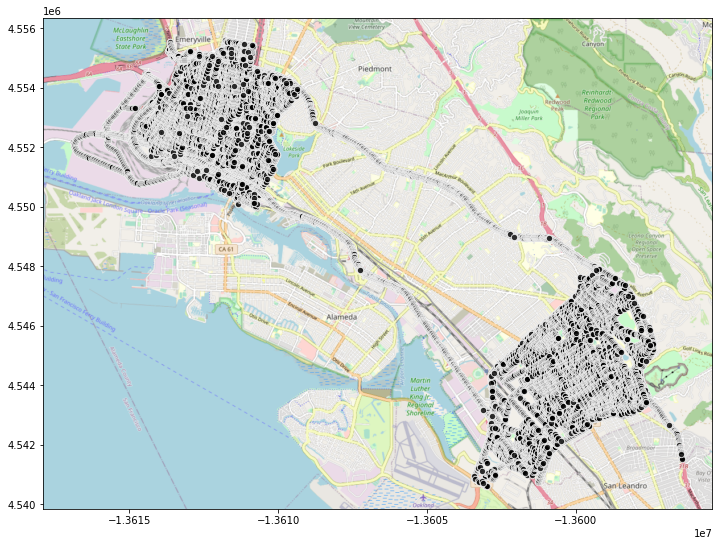

In [ ]:
# Mapping the data points
# (b) draw a figure 

fig, ax = plt.subplots(figsize=(12, 10))
gpd_1_degree.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="black",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# fig.savefig('output/file_name', dpi = 400, transparent = True)

# 3.Data Cleaning

In [ ]:
# Check dataframe
df_1.head(2)

NO value  NO2 value  PM2p5 value                     geometry  road_type  \
0  23.390071  17.539762    17.612700  POINT (-122.32259 37.80678)   tertiary   
1  19.700000  19.956750    15.946719  POINT (-122.32231 37.80615)  secondary   

         zone                                     tract_name       GEOID  \
0  industrial  Census Tract 9819, Alameda County, California  6001981900   
1  industrial  Census Tract 9819, Alameda County, California  6001981900   

   state  county   pop_den      wind       temp   Longitude   Latitude  \
0      6       1  8.336845  4.133333  14.950001 -122.322594  37.806781   
1      6       1  8.336845  4.133333  14.950001 -122.322310  37.806150   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8  
1           high  0.7 - 0.8

## Rename

In [ ]:
# Rename (replacing 'NO value' to 'NO')
df_1 = df_1.rename(columns={'NO value': 'NO'})

# Rename (replacing 'NO2 value' to 'NO')
df_1 = df_1.rename(columns={'NO2 value': 'NO2'})

# Rename (replacing 'NO value' to 'NO')
df_1 = df_1.rename(columns={'PM2p5 value': 'PM2p5'})

# EDF_points = EDF_points.rename(index=str, columns={"NO Value": "NO", "NO2 Value": "NO2", "PM2p5 Value": "PM2p5"})

## Drop Irrelevant Feature

In [ ]:
# count unique values for each feature - do this step bf missing data
print("*** Cnts of Each Feature ***")
print(df_1.nunique())

*** Cnts of Each Feature ***
NO                16015
NO2               18226
PM2p5             18281
geometry          18281
road_type             6
zone                  5
tract_name           73
GEOID                73
state                 1
county                1
pop_den              73
wind                 45
temp                 80
Longitude         18129
Latitude          18257
Respiratory_HI        3
Pt_CANCR              3
dtype: int64


In [ ]:
df_1.head(2)

NO        NO2      PM2p5                     geometry  road_type  \
0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   tertiary   
1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)  secondary   

         zone                                     tract_name       GEOID  \
0  industrial  Census Tract 9819, Alameda County, California  6001981900   
1  industrial  Census Tract 9819, Alameda County, California  6001981900   

   state  county   pop_den      wind       temp   Longitude   Latitude  \
0      6       1  8.336845  4.133333  14.950001 -122.322594  37.806781   
1      6       1  8.336845  4.133333  14.950001 -122.322310  37.806150   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8  
1           high  0.7 - 0.8

In [ ]:
# Drop columns (features)
df_1_drop = df_1.drop(['state', 'county', 'tract_name', 'GEOID'], axis=1)

df_1_drop.head(2)

NO        NO2      PM2p5                     geometry  road_type  \
0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   tertiary   
1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)  secondary   

         zone   pop_den      wind       temp   Longitude   Latitude  \
0  industrial  8.336845  4.133333  14.950001 -122.322594  37.806781   
1  industrial  8.336845  4.133333  14.950001 -122.322310  37.806150   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8  
1           high  0.7 - 0.8

## Missing Data

In [ ]:
# (0) Size of data
print ("Num of rows: " + str(df_1_drop.shape[0])) # row count
print ("Num of columns: " + str(df_1_drop.shape[1])) # col count

Num of rows: 18286
Num of columns: 13


In [ ]:
# (1) Check missing data 
print("*** Missing Values ***")
print('Sum of N/A values', df_1_drop.isnull().sum())

*** Missing Values ***
Sum of N/A values NO                 0
NO2                0
PM2p5              0
geometry           0
road_type          0
zone              48
pop_den            0
wind              16
temp              16
Longitude          0
Latitude           0
Respiratory_HI     0
Pt_CANCR           0
dtype: int64


In [ ]:
# (2) Choose a method of handling the missing data - drop all N/A?  avg?  front fill?   back fill?
df_1_miss = df_1_drop.dropna(axis=0, subset=['zone', 'wind', 'temp'])

df_1_miss.tail(2)

NO        NO2      PM2p5                     geometry road_type  \
18284   9.333333   9.039947  11.325624  POINT (-122.15509 37.77014)  motorway   
18285  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)  motorway   

              zone      pop_den      wind       temp   Longitude   Latitude  \
18284  residential  1475.818172  3.766667  14.600001 -122.155090  37.770138   
18285  residential   486.040242  3.816667  15.041669 -122.139033  37.732464   

      Respiratory_HI Pt_CANCR  
18284            low    < 0.4  
18285            low    < 0.4

In [ ]:
# (3) Reset index
df_1_miss = df_1_miss.reset_index()

# (4) Check info
df_1_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   index           18222 non-null  int64   
 1   NO              18222 non-null  float64 
 2   NO2             18222 non-null  float64 
 3   PM2p5           18222 non-null  float64 
 4   geometry        18222 non-null  geometry
 5   road_type       18222 non-null  object  
 6   zone            18222 non-null  object  
 7   pop_den         18222 non-null  float64 
 8   wind            18222 non-null  float64 
 9   temp            18222 non-null  float64 
 10  Longitude       18222 non-null  float64 
 11  Latitude        18222 non-null  float64 
 12  Respiratory_HI  18222 non-null  object  
 13  Pt_CANCR        18222 non-null  object  
dtypes: float64(8), geometry(1), int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
# (5) Remove index
df_1_miss = df_1_miss.drop(['index'], axis=1)

## Duplicated values

In [ ]:
# (0) Size of data
print ("Num of rows: " + str(df_1_miss.shape[0])) # row count
print ("Num of columns: " + str(df_1_miss.shape[1])) # col count

Num of rows: 18222
Num of columns: 13


In [ ]:
# (1) Extract duplicated row
df_1_miss[df_1_miss.duplicated()]

NO        NO2      PM2p5                     geometry  road_type  \
174   32.059862  24.190178  19.514652  POINT (-122.30853 37.81503)  secondary   
504   16.426667  19.134740  18.727645  POINT (-122.30013 37.80641)  secondary   
7161  92.638344  45.426999  28.987625  POINT (-122.23379 37.77509)   motorway   

            zone      pop_den      wind       temp   Longitude   Latitude  \
174   industrial   220.026011  4.125000  15.000001 -122.308528  37.815028   
504        mixed  3520.358174  4.083333  15.083335 -122.300129  37.806411   
7161       mixed  2351.277070  4.091667  15.166668 -122.233788  37.775092   

     Respiratory_HI   Pt_CANCR  
174            high  0.7 - 0.8  
504            high  0.7 - 0.8  
7161           high  0.7 - 0.8

In [ ]:
# (2) Print the first & last rows BEFORE removing duplicated values
df_1_miss.iloc[[0,-1]]

NO        NO2      PM2p5                     geometry road_type  \
0      23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)  tertiary   
18221  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)  motorway   

              zone     pop_den      wind       temp   Longitude   Latitude  \
0       industrial    8.336845  4.133333  14.950001 -122.322594  37.806781   
18221  residential  486.040242  3.816667  15.041669 -122.139033  37.732464   

      Respiratory_HI   Pt_CANCR  
0               high  0.7 - 0.8  
18221            low      < 0.4

In [ ]:
# # Remove duplicated row 
# # (method one) keep='first' -> the first occurrence gets kept, and all others get identified as duplicates.
# new = df.drop_duplicates(subset=['column1'], keep='first', inplace=False)
# # (method two) keep='last' -> the last occurrence gets kept, and all others get identified as duplicates.
# new = df.drop_duplicates(subset=['column1'], keep='first', inplace=False)
# # (method three) keep='False' -> remove all duplicates
# new = df.drop_duplicates(subset=['column1'], keep='false', inplace=False)


# (3) Remove duplicated values
df_1_dup = df_1_miss.drop_duplicates()
df_1_dup.tail(2)

NO        NO2      PM2p5                     geometry road_type  \
18220   9.333333   9.039947  11.325624  POINT (-122.15509 37.77014)  motorway   
18221  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)  motorway   

              zone      pop_den      wind       temp   Longitude   Latitude  \
18220  residential  1475.818172  3.766667  14.600001 -122.155090  37.770138   
18221  residential   486.040242  3.816667  15.041669 -122.139033  37.732464   

      Respiratory_HI Pt_CANCR  
18220            low    < 0.4  
18221            low    < 0.4

In [ ]:
# (4) Reset index, creating a new df 
df_1_dup.reset_index(inplace=True)
# (5) Check duplicated values
df_1_dup[df_1_dup.duplicated()]

Empty DataFrame
Columns: [index, NO, NO2, PM2p5, geometry, road_type, zone, pop_den, wind, temp, Longitude, Latitude, Respiratory_HI, Pt_CANCR]
Index: []

In [ ]:
# (6) Print the first & last rows AFTER removing duplicated values
df_1_dup.iloc[[0,-1]]

index         NO        NO2      PM2p5                     geometry  \
0          0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
18218  18221  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)   

      road_type         zone     pop_den      wind       temp   Longitude  \
0      tertiary   industrial    8.336845  4.133333  14.950001 -122.322594   
18218  motorway  residential  486.040242  3.816667  15.041669 -122.139033   

        Latitude Respiratory_HI   Pt_CANCR  
0      37.806781           high  0.7 - 0.8  
18218  37.732464            low      < 0.4

## Outliers

In [ ]:
# Copy
df_1_out = df_1_dup.copy()

df_1_out.head(1)

index         NO        NO2    PM2p5                     geometry  \
0      0  23.390071  17.539762  17.6127  POINT (-122.32259 37.80678)   

  road_type        zone   pop_den      wind       temp   Longitude   Latitude  \
0  tertiary  industrial  8.336845  4.133333  14.950001 -122.322594  37.806781   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8

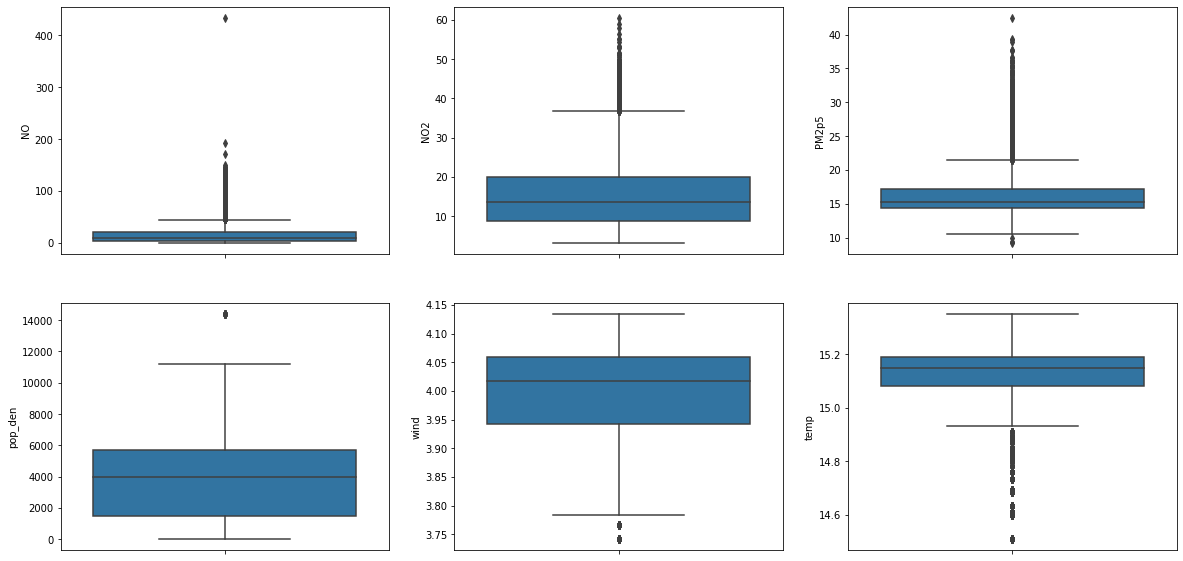

In [ ]:
# Checking outliers

_,axss = plt.subplots(2,3, figsize=[20,10])  # create a 2x3 matrix = 6 figures
sns.boxplot(y ='NO', data=df_1_out, ax=axss[0, 0])
sns.boxplot(y ='NO2', data=df_1_out, ax=axss[0, 1])
sns.boxplot(y ='PM2p5', data=df_1_out, ax=axss[0, 2])
sns.boxplot(y ='pop_den', data=df_1_out, ax=axss[1][0])
sns.boxplot(y ='wind', data=df_1_out, ax=axss[1][1])
sns.boxplot(y ='temp', data=df_1_out, ax=axss[1][2])

In [ ]:
# Mannually remove outliers based on knowledge
# if NO > 200 -> let all of them equl to 200
df_1_out.loc[df_1_out['NO'] > 200, 'NO'] = 200

# 4.Feature Engineering

## Oakland city

In [ ]:
# Import oakland street and map data
Oakland_poly = ox.geocode_to_gdf('Oakland, California')

Oakland_poly

geometry  bbox_north  bbox_south  \
0  POLYGON ((-122.35588 37.83573, -122.35009 37.8...   37.885426   37.633676   

   bbox_east   bbox_west   place_id  osm_type   osm_id        lat         lon  \
0 -122.11442 -122.355881  282592335  relation  2833530  37.804456 -122.271356   

                                        display_name     class  \
0  Oakland, Alameda County, California, United St...  boundary   

             type  importance  
0  administrative    0.851796

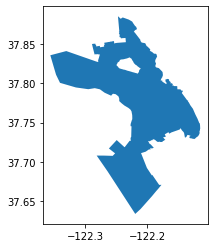

In [ ]:
Oakland_poly.plot()

### convert geo

In [ ]:
# Check
Oakland_poly.crs, gpd_1_degree.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich, <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [ ]:
# Conver geometey object -> geo df
gpd_1_degree = gpd.GeoDataFrame(df_1_out, geometry = df_1_out['geometry'], crs={'init' :'epsg:4326'})

Oakland_poly.crs, gpd_1_degree.crs

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich, <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [ ]:
gpd_1_degree.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp   Longitude  \
0   tertiary  industrial  8.336845  4.133333  14.950001 -122.322594   
1  secondary  industrial  8.336845  4.133333  14.950001 -122.322310   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8

### Spatial-join

In [ ]:
# spatial-join pollutant and health data in Oakland polygon grid (make sure all data represent Oakland city)
gpd_1_city = gpd.sjoin(gpd_1_degree, Oakland_poly, how="inner", op="intersects")

gpd_1_city.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  


index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...   bbox_west  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ... -122.355881   
1  secondary  industrial  8.336845  4.133333  14.950001  ... -122.355881   

    place_id  osm_type   osm_id        lat         lon  \
0  282592335  relation  2833530  37.804456 -122.271356   
1  282592335  relation  2833530  37.804456 -122.271356   

                                        display_name     class  \
0  Oakland, Alameda County, California, United St...  boundary   
1  Oakland, Alameda County, California, United St...  boundary   

             type  importance  
0  administrative    0.851796  
1  administrative    0.851796  

[2 rows x 28 columns]

In [ ]:
# count unique values for each feature
print("*** Cnts of Each Feature ***")
print(gpd_1_city.nunique())

*** Cnts of Each Feature ***
index             18219
NO                15963
NO2               18162
PM2p5             18217
geometry          18217
road_type             6
zone                  5
pop_den              70
wind                 45
temp                 80
Longitude         18067
Latitude          18194
Respiratory_HI        3
Pt_CANCR              3
index_right           1
bbox_north            1
bbox_south            1
bbox_east             1
bbox_west             1
place_id              1
osm_type              1
osm_id                1
lat                   1
lon                   1
display_name          1
class                 1
type                  1
importance            1
dtype: int64


In [ ]:
gpd_1_city = gpd_1_city.drop(['index_right', 'bbox_east', 'bbox_north', 'bbox_south', 'bbox_west'], axis=1)

## City structure: Roads

### city

In [ ]:
# (1) grab street data (roads and intersections) for entire city
oak_streets = ox.graph_from_place('Oakland, California', network_type = 'drive')
nodes, edges = ox.graph_to_gdfs(oak_streets)

In [ ]:
Oakland_poly.head(5)

geometry  bbox_north  bbox_south  \
0  POLYGON ((-122.35588 37.83573, -122.35009 37.8...   37.885426   37.633676   

   bbox_east   bbox_west   place_id  osm_type   osm_id        lat         lon  \
0 -122.11442 -122.355881  282592335  relation  2833530  37.804456 -122.271356   

                                        display_name     class  \
0  Oakland, Alameda County, California, United St...  boundary   

             type  importance  
0  administrative    0.851796

In [ ]:
nodes.head(1)

y           x ref            highway  street_count  \
osmid                                                                  
30362888  37.825844 -122.303049  8A  motorway_junction             3   

                             geometry  
osmid                                  
30362888  POINT (-122.30305 37.82584)

In [ ]:
edges.head(1)

osmid  oneway lanes   ref   highway maxspeed  \
u        v          key                                                     
30362888 1943438853 0    710721717    True     7  I 80  motorway   50 mph   

                          length  \
u        v          key            
30362888 1943438853 0    135.576   

                                                                  geometry  \
u        v          key                                                      
30362888 1943438853 0    LINESTRING (-122.30305 37.82584, -122.30455 37...   

                        bridge name tunnel access junction  
u        v          key                                     
30362888 1943438853 0      NaN  NaN    NaN    NaN      NaN

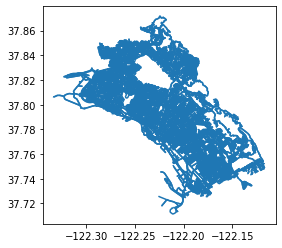

In [ ]:
edges.plot()

### road

In [ ]:
# (2 - a) Identify roads 
oakland_rds = edges.copy()
print(oakland_rds['highway'].value_counts())
print ("Num of rows: " + str(oakland_rds.shape[0])) # row count
print ("Num of columns: " + str(oakland_rds.shape[1])) # col count

residential                        14963
secondary                           2927
tertiary                            2532
primary                              714
motorway_link                        319
unclassified                         219
motorway                             203
living_street                        120
secondary_link                       107
trunk                                 57
tertiary_link                         43
trunk_link                            38
primary_link                          15
[residential, unclassified]            8
[residential, living_street]           2
[motorway_link, secondary_link]        1
[secondary_link, motorway_link]        1
Name: highway, dtype: int64
Num of rows: 22269
Num of columns: 13


In [ ]:
# (2 - b) Clean roads 

# remove '_link' in xxx_link & add it to xxx 
# (e.g., motorway_link is added on motorway )
oakland_rds['highway'] = oakland_rds['highway'].str.replace('_link', '')


# 'trunk'  -->  'secondary'
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'trunk', 'secondary', oakland_rds['highway'])


# 'living_street' --> 'residential'
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'living_street', 'residential', oakland_rds['highway'])

# Check results
print(oakland_rds['highway'].value_counts())

residential     15083
secondary        3129
tertiary         2575
primary           729
motorway          522
unclassified      219
Name: highway, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


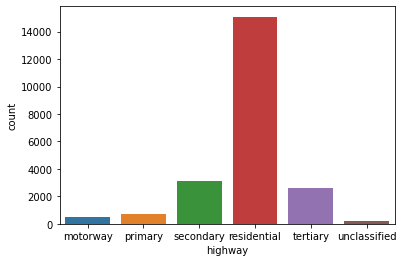

In [ ]:
sns.countplot(oakland_rds['highway'])

### map

In [ ]:
# (3) Map them out 

# grab subsets of roadtypes
oakland_highways = oakland_rds[oakland_rds.highway == 'motorway']
oakland_primary = oakland_rds[oakland_rds.highway == 'primary']
oakland_secondary = oakland_rds[oakland_rds.highway == 'secondary']
oakland_tertiary = oakland_rds[oakland_rds.highway == 'tertiary']
oakland_resid = oakland_rds[oakland_rds.highway == 'residential']

oakland_highways.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

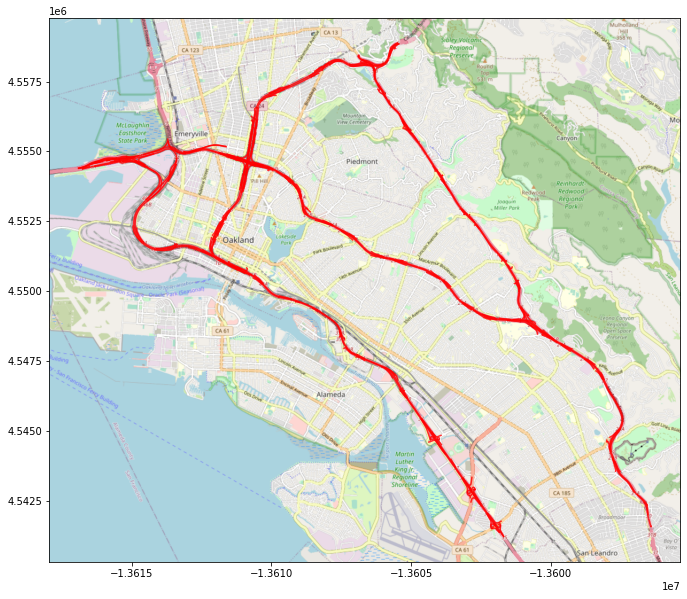

In [ ]:
# Highway
fig, ax = plt.subplots(figsize=(12, 10))
oakland_highways.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="red",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

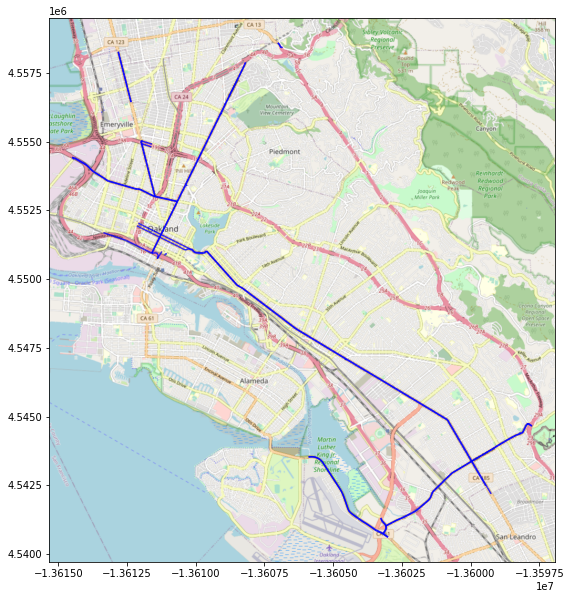

In [ ]:
# Primary road
fig, ax = plt.subplots(figsize=(12, 10))
oakland_primary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

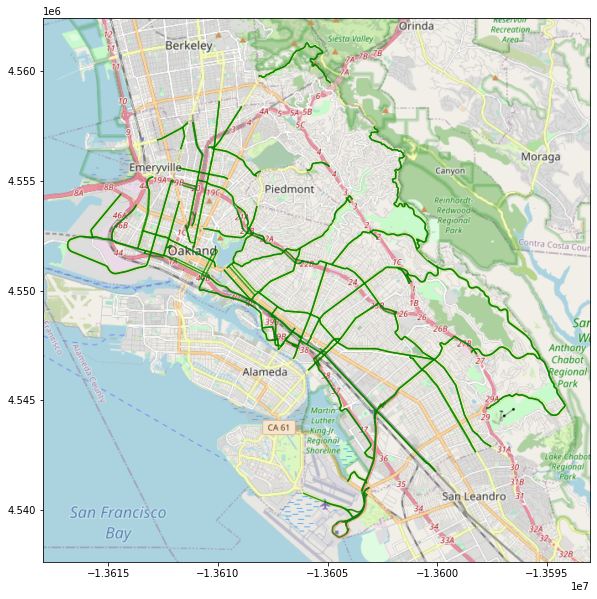

In [ ]:
# Secondary road
fig, ax = plt.subplots(figsize=(12, 10))
oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="green",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

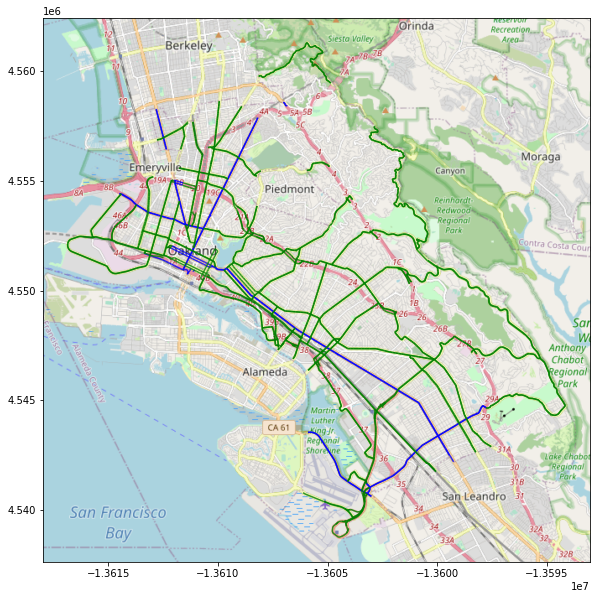

In [ ]:
# Primary & Secondary

fig, ax = plt.subplots(figsize=(12, 10))
oakland_primary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="green",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

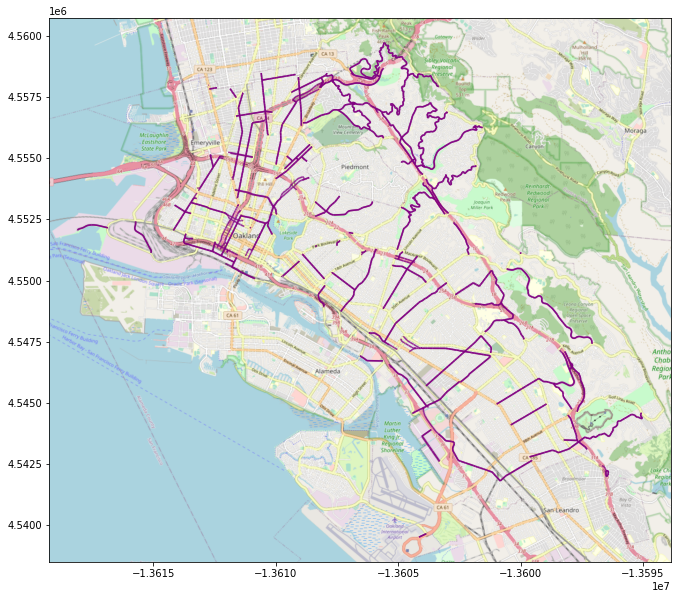

In [ ]:
# Tertiary road
fig, ax = plt.subplots(figsize=(12, 10))
oakland_tertiary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="purple",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

### road type (homework)

In [ ]:
# gpd_1_city.crs, oakland_rds.crs

In [ ]:
# #remove doubled road IDs, this is only 20 roads out of 22335, but they cause subsetting problems
# oakland_rds = remove_doubleID_streets(edges)

# def find_closest_road(gps, roads, buffer_dist = 0.0003):
#     '''Find the closest road to a GPS point. If no roads are within 30m the point is considered outside
#     of a known roadway'''
#     road_index = roads.sindex
#     circle = gps.buffer(buffer_dist) #build buffer around point (~ 30 meters)

#     possible_matches_index = list(road_index.intersection(circle.bounds)) #get index of possible nearest roads
#     possible_matches = roads.iloc[possible_matches_index]
#     precise_matches = possible_matches[possible_matches.intersects(circle)].copy()

#     #get distances to roads in buffer
#     precise_matches['distance'] = precise_matches['geometry'].distance(gps)
    
#     if precise_matches['distance'].empty is False:
#         return(precise_matches.sort_values(['distance']).drop_duplicates('distance').iloc[0, 3])
#     else:
#         return('outside_area')
    
    

# # Create a new categorical feature - calculate road_type for each point ...
# gpd_1_city['road_type'] = gpd_1_city['geometry'].apply(find_closest_road, roads = oakland_rds)

# gpd_1_city.road_type.value_counts()

### road distance

In [ ]:
gpd_1_city.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Conver geometey from degree -> meter (utm: unit in meter)
# 'epsg:32610' == meter 
# 'epsg:4326' == degree
gpd_1_city_utm = gpd_1_city.to_crs({'init': 'epsg:32610'}).copy()      # much faster to do the re-projection to meters
highway_utm = oakland_highways.to_crs({'init': 'epsg:32610'}).copy()
primary_utm = oakland_primary.to_crs({'init': 'epsg:32610'}).copy()
secondary_utm = oakland_secondary.to_crs({'init': 'epsg:32610'}).copy()
tertiary_utm = oakland_tertiary.to_crs({'init': 'epsg:32610'}).copy()


# UDF
def distance_to_roadway(gps, roadway):
    '''Calculate distance from GPS point to nearest road line polygon'''
    dists = []
    for i in roadway.geometry:
        dists.append(i.distance(gps))
    return(np.min(dists))


# # Calculate distance to nearest major roadway
# gpd_1_city['closest_highway'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = highway_utm)
# gpd_1_city['closest_primary'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = primary_utm)
# gpd_1_city['closest_secondary'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = secondary_utm)
# gpd_1_city['closest_tertiary'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = tertiary_utm)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

In [ ]:
# Calculate distance to nearest highway
tqdm.pandas()
gpd_1_city['closest_highway'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = highway_utm)
# gpd_1_city['closest_highway'] = gpd_1_city['geometry'].apply(distance_to_roadway, roadway = highway_utm)

100%|██████████| 18219/18219 [01:02<00:00, 292.65it/s]


In [ ]:
# Calculate distance to nearest primary road
tqdm.pandas()
gpd_1_city['closest_primary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = primary_utm)

100%|██████████| 18219/18219 [01:22<00:00, 220.94it/s]


In [ ]:
# Calculate distance to nearest secondary road
tqdm.pandas()
gpd_1_city['closest_secondary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = secondary_utm)

100%|██████████| 18219/18219 [05:54<00:00, 51.41it/s]


In [ ]:
# Calculate distance to nearest tertiary road
tqdm.pandas()
gpd_1_city['closest_tertiary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = tertiary_utm)

100%|██████████| 18219/18219 [04:53<00:00, 62.12it/s]


In [ ]:
gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...        lat  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...  37.804456   
1  secondary  industrial  8.336845  4.133333  14.950001  ...  37.804456   

          lon                                       display_name     class  \
0 -122.271356  Oakland, Alameda County, California, United St...  boundary   
1 -122.271356  Oakland, Alameda County, California, United St...  boundary   

             type importance  closest_highway  closest_primary  \
0  administrative   0.851796      1529.354679      2576.575272   
1  administrative   0.851796      1510.616902      2605.774822   

   closest_secondary closest_tertiary  
0       3.000134e+01         0.003395  
1       5.010205e-08        63.387249  

[2 rows x 27 columns]

## City Structure: traffic signal & stop sign

### identify

In [ ]:
# (1) Identify traffic signals & stop signs 
nodes['highway'].value_counts()

traffic_signals      684
turning_circle       317
stop                 305
motorway_junction    131
crossing               8
mini_roundabout        4
trailhead              3
Name: highway, dtype: int64

In [ ]:
nodes.head(2)

y           x  ref            highway  street_count  \
osmid                                                                   
30362888  37.825844 -122.303049   8A  motorway_junction             3   
30363957  37.825477 -122.307034  NaN                NaN             3   

                             geometry  
osmid                                  
30362888  POINT (-122.30305 37.82584)  
30363957  POINT (-122.30703 37.82548)

In [ ]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### map

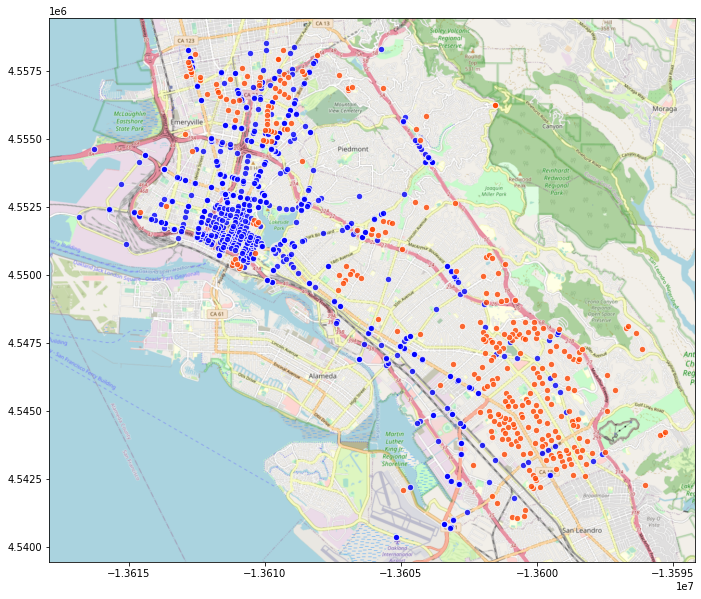

In [ ]:
# (2) Map them out

trafic_signals = nodes[nodes['highway'] == 'traffic_signals']
stop_cross = nodes[nodes['highway'] == 'stop']


# Traffic signal: blue
# Stop sign: red
fig, ax = plt.subplots(figsize=(12, 10))
trafic_signals.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
stop_cross.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="orangered",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

### intersection & traffic signal

In [ ]:
# (3 - a) Conver geometey from degree -> meter (utm: unit in meter)
# 'epsg:32610' == meter 
# 'epsg:4326' == degree
traffic_sig_utm = trafic_signals.to_crs({'init': 'epsg:32610'}).copy()    # much faster to do the re-projection to meters
stop_sign_utm = stop_cross.to_crs({'init': 'epsg:32610'}).copy()      


# (3 - b) set UDF

def nearest_intersection(gps, intersections):
    ''' Calculates distance from GPS point to nearest intersection'''
    closest_point = nearest_points(gps, MultiPoint(intersections.values))[1]
    return(gps.distance(closest_point))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# (3 - c) Calculate distance to nearest traffic signal
tqdm.pandas()
gpd_1_city['trafic_signal_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = traffic_sig_utm['geometry'])
# gpd_1_city['trafic_signal_dist'] = gpd_1_city['geometry'].apply(nearest_intersection, intersections = traffic_sig_utm['geometry'])

100%|██████████| 18219/18219 [01:13<00:00, 246.79it/s]


In [ ]:
# (3 - c) Calculate distance to nearest traffic signal
tqdm.pandas()
gpd_1_city['stop_sign_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = stop_sign_utm['geometry'])

100%|██████████| 18219/18219 [00:32<00:00, 555.95it/s]


## Category Encoding

In [ ]:
gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...   
1  secondary  industrial  8.336845  4.133333  14.950001  ...   

                                        display_name     class  \
0  Oakland, Alameda County, California, United St...  boundary   
1  Oakland, Alameda County, California, United St...  boundary   

             type importance  closest_highway closest_primary  \
0  administrative   0.851796      1529.354679     2576.575272   
1  administrative   0.851796      1510.616902     2605.774822   

   closest_secondary  closest_tertiary  trafic_signal_dist stop_sign_dist  
0       3.000134e+01          0.003395           30.001344    1818.142667  
1       5.010205e-08         63.387249           63.387249    1800.106387  

[2 rows x 29 columns]

In [ ]:
# For data visualization 
zone = gpd_1_city['zone']
road_type = gpd_1_city['road_type']

In [ ]:
# One-hot encoding: convert category features to numerical features（0 & 1） - spliting into diff columns
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['road_type'], drop_first=False)      # drop_first=False: do not remove a lable to reduce multicollision 
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['zone'], drop_first=False)

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

    pop_den      wind       temp   Longitude   Latitude  ...  \
0  8.336845  4.133333  14.950001 -122.322594  37.806781  ...   
1  8.336845  4.133333  14.950001 -122.322310  37.806150  ...   

  road_type_primary road_type_residential  road_type_secondary  \
0                 0                     0                    0   
1                 0                     0                    1   

  road_type_tertiary  road_type_unclassified  zone_commercial  \
0                  1                       0                0   
1                  0                       0                0   

   zone_industrial zone_mixed zone_open_space zone_residential  
0                1          0               0                0  
1                1          0               0                0  

[2 rows x 38 columns]

In [ ]:
# Merge them back - for visualization
# axis = 1: rows invariant，but features increased
gpd_1_city = pd.concat([gpd_1_city, zone], axis = 1)
gpd_1_city = pd.concat([gpd_1_city, road_type], axis = 1)

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

    pop_den      wind       temp   Longitude   Latitude  ...  \
0  8.336845  4.133333  14.950001 -122.322594  37.806781  ...   
1  8.336845  4.133333  14.950001 -122.322310  37.806150  ...   

  road_type_secondary road_type_tertiary  road_type_unclassified  \
0                   0                  1                       0   
1                   1                  0                       0   

  zone_commercial  zone_industrial  zone_mixed  zone_open_space  \
0               0                1           0                0   
1               0                1           0                0   

  zone_residential        zone  road_type  
0                0  industrial   tertiary  
1                0  industrial  secondary  

[2 rows x 40 columns]

## Data Preparation

In [ ]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18219 entries, 0 to 18218
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   index                   18219 non-null  int64   
 1   NO                      18219 non-null  float64 
 2   NO2                     18219 non-null  float64 
 3   PM2p5                   18219 non-null  float64 
 4   geometry                18219 non-null  geometry
 5   pop_den                 18219 non-null  float64 
 6   wind                    18219 non-null  float64 
 7   temp                    18219 non-null  float64 
 8   Longitude               18219 non-null  float64 
 9   Latitude                18219 non-null  float64 
 10  Respiratory_HI          18219 non-null  object  
 11  Pt_CANCR                18219 non-null  object  
 12  place_id                18219 non-null  int64   
 13  osm_type                18219 non-null  object  
 14  osm_id        

### drop

In [ ]:
# Drop features
gpd_1_city = gpd_1_city.drop(['index', 'Pt_CANCR'], axis=1)

### health conversion

In [ ]:
# if df['Respiratory_HI'] contains 'high', replace "high" to "3" and save into df['Respiratory_HI']
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('high'), '3', gpd_1_city['Respiratory_HI'])

# if df['Respiratory_HI'] contains 'moderate', replace "high" to "2" and save into df['Respiratory_HI']
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('moderate'), '2', gpd_1_city['Respiratory_HI'])

# if df['Respiratory_HI'] contains 'low', replace "high" to "1" and save into df['Respiratory_HI']
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('low'), '1', gpd_1_city['Respiratory_HI'])

# convert object to float
gpd_1_city["Respiratory_HI"] = gpd_1_city.Respiratory_HI.astype(float)

gpd_1_city.head(3)
# gpd_1_city.Respiratory_HI.value_counts()

NO        NO2      PM2p5                     geometry   pop_den  \
0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)  8.336845   
1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)  8.336845   
2  23.611111  23.967768  16.210698  POINT (-122.32230 37.80642)  8.336845   

       wind       temp   Longitude   Latitude  Respiratory_HI  ...  \
0  4.133333  14.950001 -122.322594  37.806781             3.0  ...   
1  4.133333  14.950001 -122.322310  37.806150             3.0  ...   
2  4.133333  14.950001 -122.322301  37.806420             3.0  ...   

   road_type_secondary road_type_tertiary  road_type_unclassified  \
0                    0                  1                       0   
1                    1                  0                       0   
2                    1                  0                       0   

   zone_commercial  zone_industrial zone_mixed zone_open_space  \
0                0                1          0               0   
1                0                1          0               0   
2                0                1          0               0   

  zone_residential        zone  road_type  
0                0  industrial   tertiary  
1                0  industrial  secondary  
2                0  industrial  secondary  

[3 rows x 38 columns]

In [ ]:
gpd_1_city.zone.value_counts()

residential    9873
mixed          3485
commercial     3218
industrial     1419
open_space      224
Name: zone, dtype: int64

In [ ]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18219 entries, 0 to 18218
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NO                      18219 non-null  float64 
 1   NO2                     18219 non-null  float64 
 2   PM2p5                   18219 non-null  float64 
 3   geometry                18219 non-null  geometry
 4   pop_den                 18219 non-null  float64 
 5   wind                    18219 non-null  float64 
 6   temp                    18219 non-null  float64 
 7   Longitude               18219 non-null  float64 
 8   Latitude                18219 non-null  float64 
 9   Respiratory_HI          18219 non-null  float64 
 10  place_id                18219 non-null  int64   
 11  osm_type                18219 non-null  object  
 12  osm_id                  18219 non-null  int64   
 13  lat                     18219 non-null  float64 
 14  lon           

### Numerical & Categorical 

In [ ]:
# Numerical Features
numerical = ['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'closest_highway', 'closest_primary', 'closest_secondary', 'closest_tertiary', 
             'trafic_signal_dist', 'stop_sign_dist', 'road_type_motorway', 'road_type_primary', 'road_type_residential', 'road_type_secondary', 'road_type_tertiary', 
             'road_type_unclassified', 'zone_commercial', 'zone_industrial', 'zone_mixed', 'zone_open_space', 'zone_residential', 'Longitude', 'Latitude', 'Respiratory_HI']

# Categorical Features 
categorical = ['geometry', 'zone', 'road_type']

# 5.Data Visualization 

In [ ]:
df_vis = gpd_1_city.copy()

## Correlation Matrix

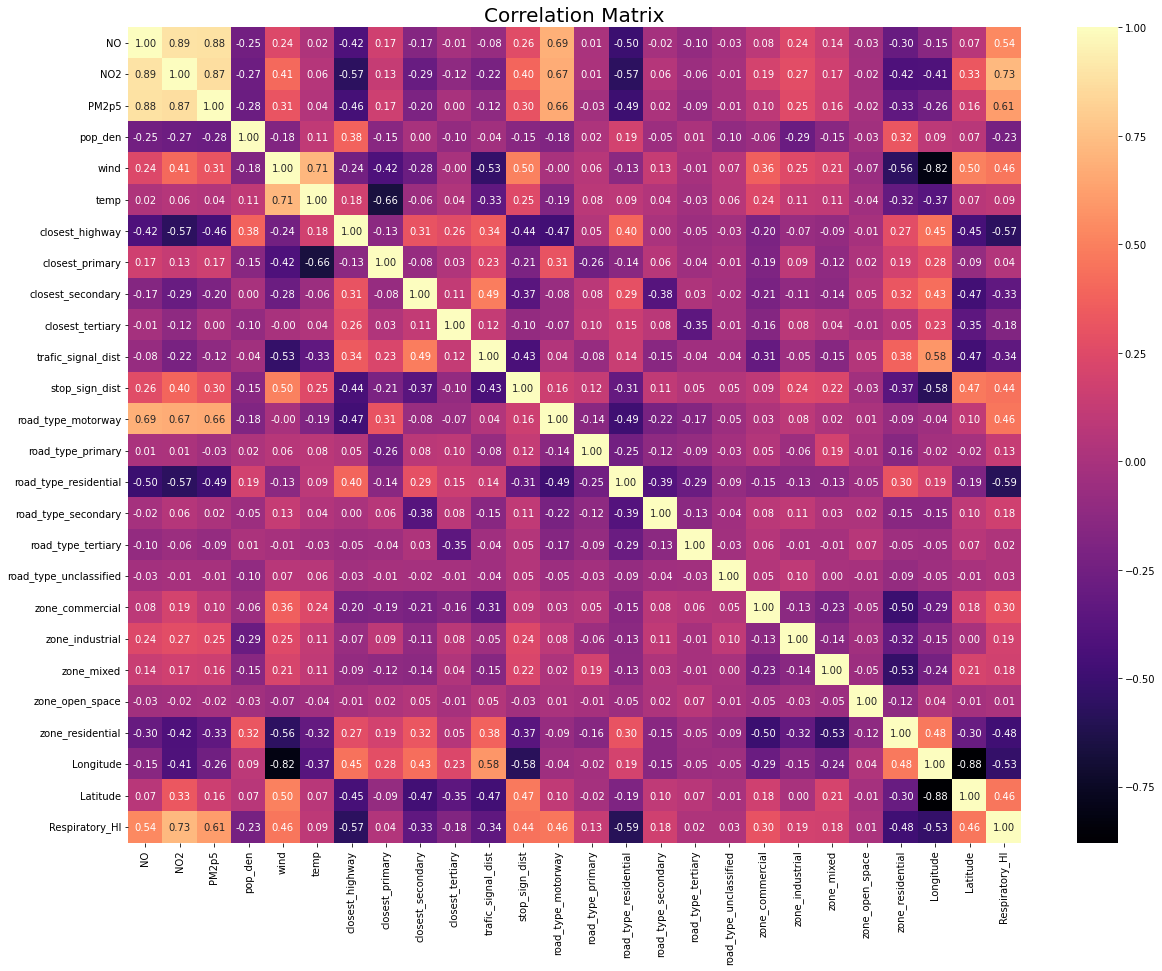

In [ ]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_vis[numerical].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
Corr = pd.DataFrame(df_vis[numerical].corr()['Respiratory_HI'].sort_values(ascending=False))
Corr = Corr.iloc[1:,:]
Corr.columns=['Target Correlation']
Corr

Target Correlation
NO2                               0.728085
PM2p5                             0.613432
NO                                0.535724
Latitude                          0.462347
road_type_motorway                0.459021
wind                              0.458197
stop_sign_dist                    0.444184
zone_commercial                   0.300468
zone_industrial                   0.192171
zone_mixed                        0.183228
road_type_secondary               0.175915
road_type_primary                 0.129512
temp                              0.094394
closest_primary                   0.044842
road_type_unclassified            0.025218
road_type_tertiary                0.024662
zone_open_space                   0.005270
closest_tertiary                 -0.176387
pop_den                          -0.230723
closest_secondary                -0.331557
trafic_signal_dist               -0.338417
zone_residential                 -0.479148
Longitude                        -0.534273
closest_highway                  -0.566353
road_type_residential            -0.592506

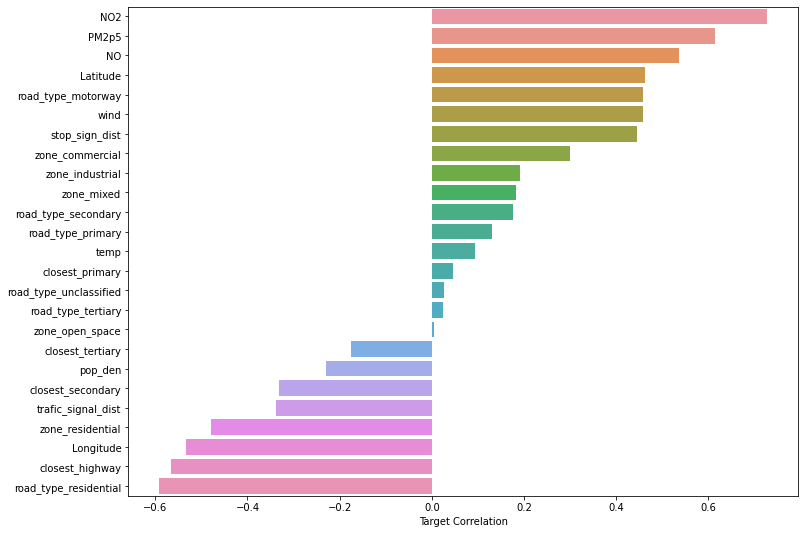

In [ ]:
g0 = sns.barplot(x="Target Correlation", y=Corr.index, data=Corr)
g0.figure.set_size_inches(12, 9)

1.   NO2易于侵入呼吸道深部细支气管及肺泡，长期低浓度吸入可导致肺部组织损坏，引起肺水肿。 有研究表明，哮喘儿童发生支气管炎症状的增多与长期接触NO2有关。 大气中过多的O3会对呼吸系统产生影响，引发哮喘、降低肺功能并导致肺部疾病。
2.   PM2.5进入肺部对局部组织有堵塞作用，可使局部支气管的通气功能下降，细支气管和肺泡的换气功能丧失。 吸附着有害气体的PM2.5可以刺激或腐蚀肺泡壁，长期作用可使呼吸道防御机能受到损害，发生支气管炎、肺气肿和支气管哮喘等



In [ ]:
gpd_1_vis = gpd_1_city.copy()

## map

Text(0, 0.5, 'Latitude')

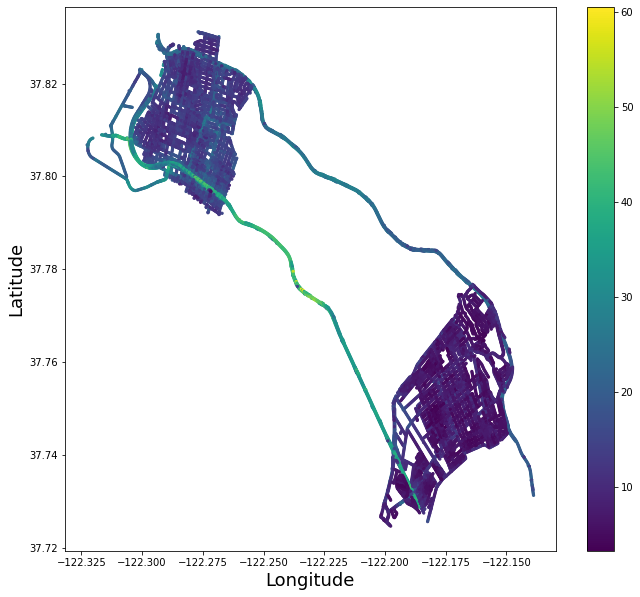

In [ ]:
# Plot the overall heatmap that will go into the web-app
plt.figure(figsize = (11, 10))
plt.scatter(gpd_1_vis.Longitude, gpd_1_vis.Latitude, s=5, c = gpd_1_vis.NO2)
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)

Text(0, 0.5, 'Latitude')

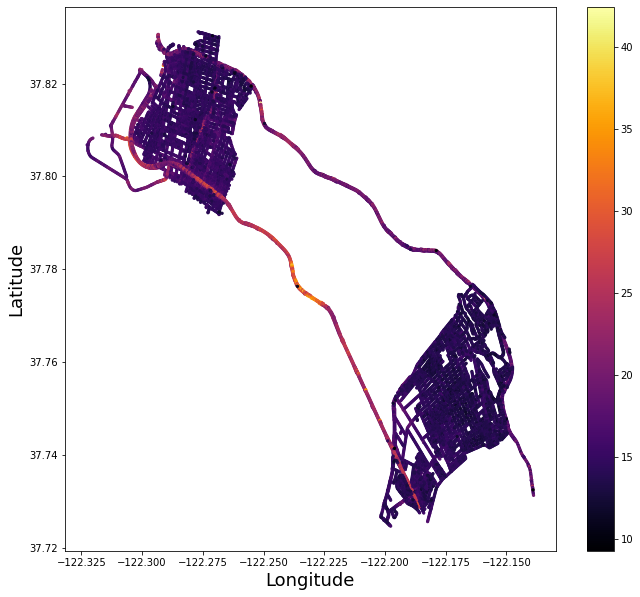

In [ ]:
# Plot the overall heatmap that will go into the web-app
plt.figure(figsize = (11, 10))
plt.scatter(gpd_1_vis.Longitude, gpd_1_vis.Latitude, s=5, c = gpd_1_vis.PM2p5, cmap='inferno')
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)

## boxplot - roads

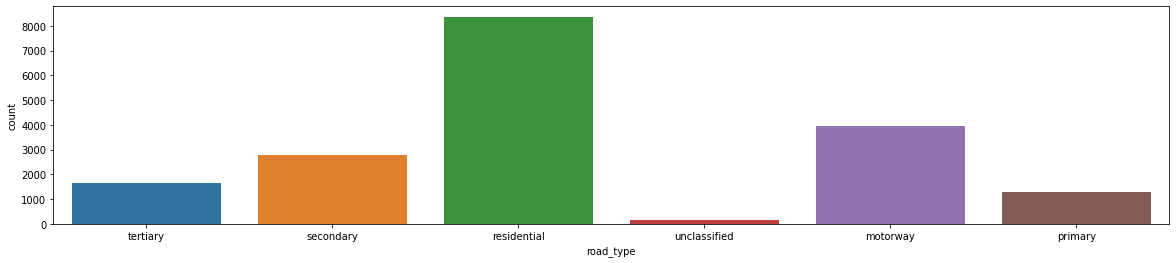

In [ ]:
# Check the sizes of data count 
plt.figure(figsize=(20,4))
sns.countplot(x = 'road_type', data = df_vis);

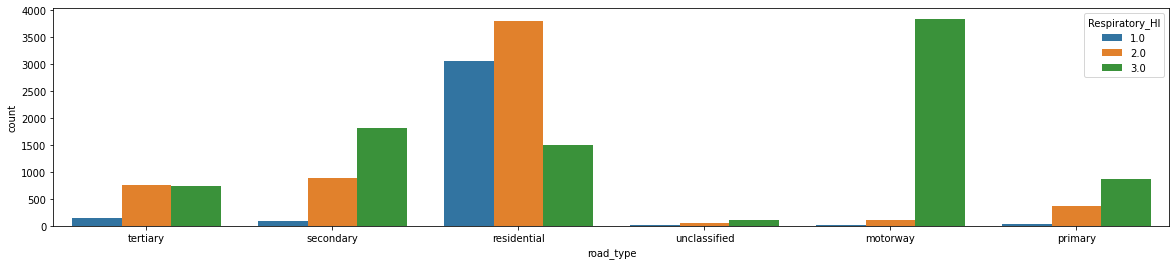

In [ ]:
# Road type & health
plt.figure(figsize=(20,4))
sns.countplot(x = 'road_type', hue = df_vis['Respiratory_HI'], data = df_vis);

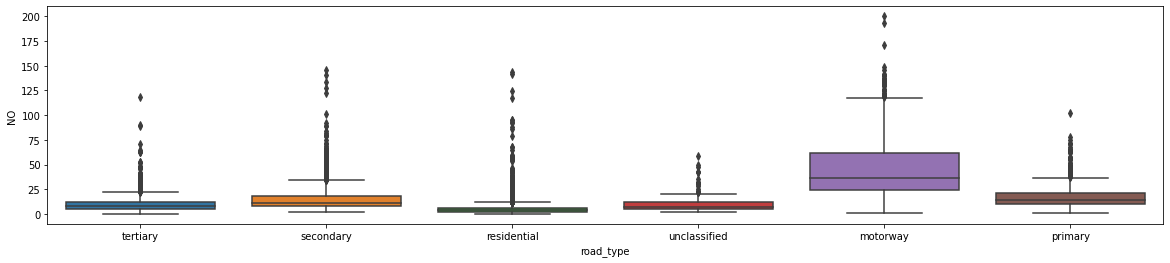

In [ ]:
# NO: road type 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['NO']);

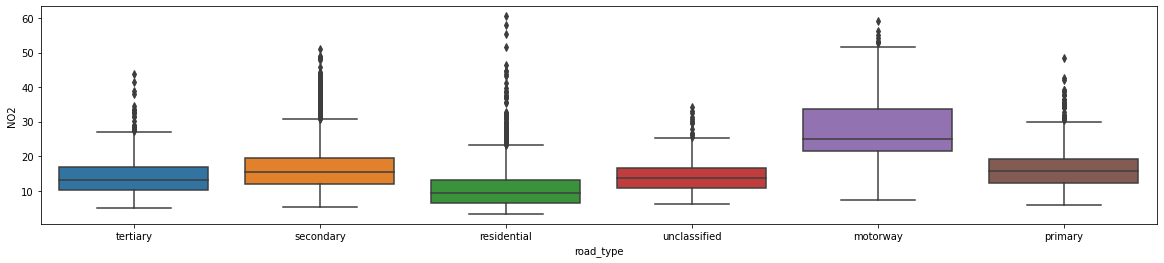

In [ ]:
# NO2: road type 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['NO2']);

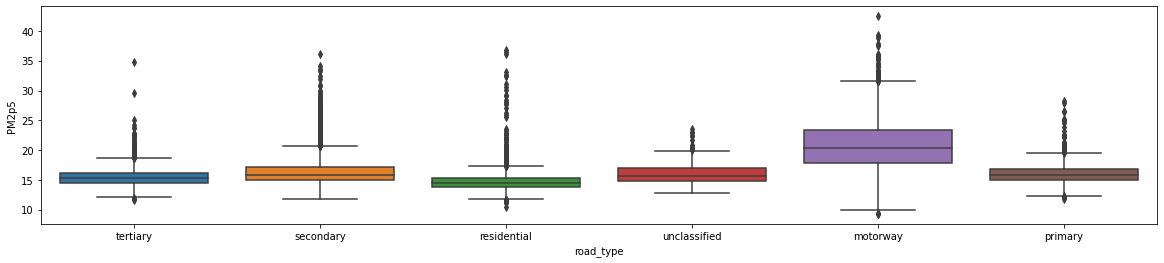

In [ ]:
# PM2.5: road type 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['PM2p5']);

## boxplot - zones

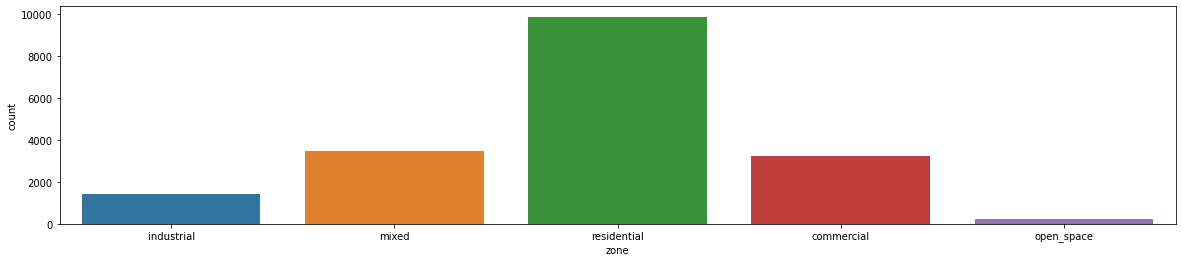

In [ ]:
# Check the sizes of data count 
plt.figure(figsize=(20,4))
sns.countplot(x = 'zone', data = df_vis);

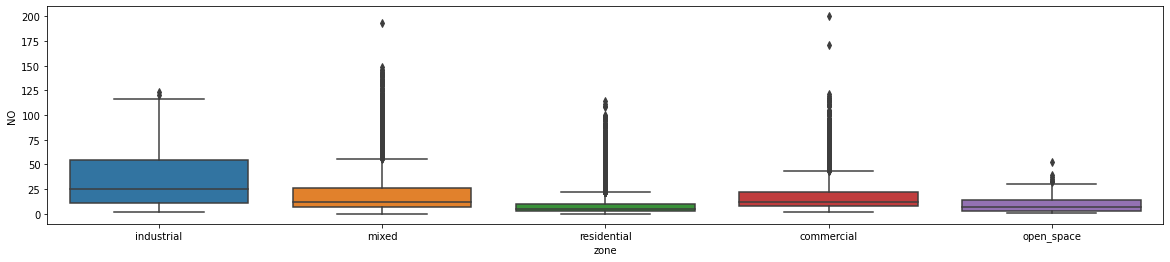

In [ ]:
# NO: zone 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO']);

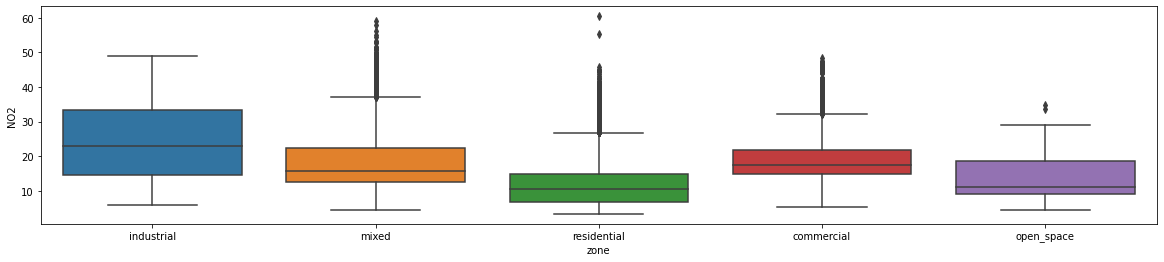

In [ ]:
# NO2: zone 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO2']);

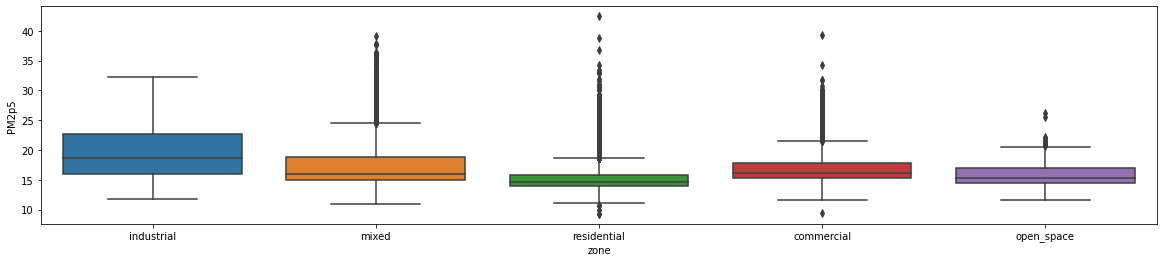

In [ ]:
# PM2.5: zone
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['PM2p5']);

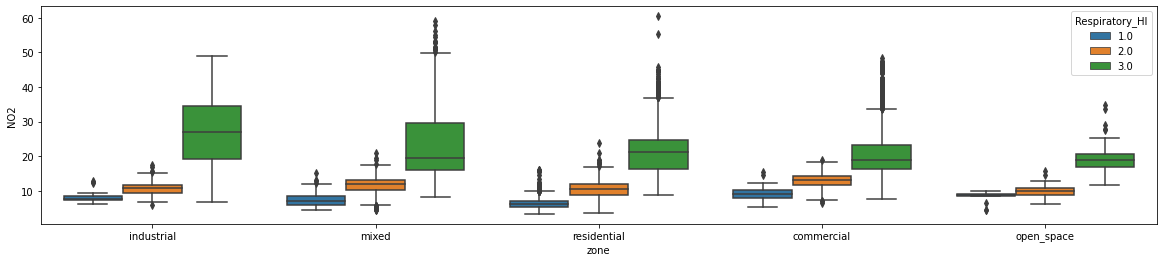

In [ ]:
# NO2: zone & health
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO2'], hue = df_vis['Respiratory_HI']);

## distance

Text(0, 0.5, 'PM2.5 (ug/m3)')

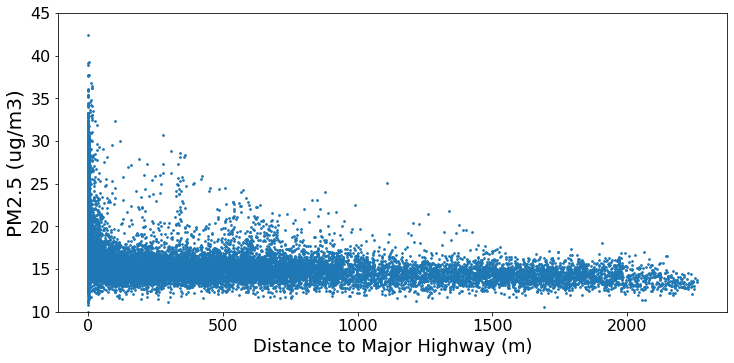

In [ ]:
# PM2p5
plt.figure(figsize=(12, 5.5))
plt.scatter(df_vis['closest_highway'], df_vis['PM2p5'], s=3)
plt.ylim(10, 45)
plt.tick_params(labelsize=16)
plt.xlabel('Distance to Major Highway (m)', fontsize=18); plt.ylabel('PM2.5 (ug/m3)', fontsize=20)
# plt.savefig('highway_distance.png', format='png', dpi=300)

# 6.Model

In [ ]:
df_model = df_vis.copy()

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')

    
def pred_summary(pred, ytest, limit = 200):
    """Plotting for test set predictions"""
    sns.scatterplot(pred, ytest)
    abline(1, 0) #1-1 line
    plt.ylim(0, limit); plt.xlim(0, limit)
    plt.tick_params(labelsize=18)
    
    print('RMSE', np.sqrt(mean_squared_error(ytest, pred)))
    print('R2', r2_score(ytest, pred))
    
    
    
def plot_corr(df, size=10, MI = False):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    if MI == False:
        corr = df.corr()
    else:
        K = df.shape[1]
        corr = np.empty((K, K), dtype=float)
        
        for i, ac in enumerate(X.columns):
            for j, bc in enumerate(X.columns):
                MI = mutual_information(X.loc[:, ac], X.loc[:, bc], bins=10, normalize=True)
                corr[i, j] = MI
        
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

## Feature selection

In [ ]:
df_model[numerical].columns

Index(['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'closest_highway',
       'closest_primary', 'closest_secondary', 'closest_tertiary',
       'trafic_signal_dist', 'stop_sign_dist', 'road_type_motorway',
       'road_type_primary', 'road_type_residential', 'road_type_secondary',
       'road_type_tertiary', 'road_type_unclassified', 'zone_commercial',
       'zone_industrial', 'zone_mixed', 'zone_open_space', 'zone_residential',
       'Longitude', 'Latitude', 'Respiratory_HI'],
      dtype='object')

In [ ]:
X = df_model[numerical].drop(['Respiratory_HI', 'Longitude','Latitude', 'road_type_unclassified','NO', 'NO2', 'PM2p5'], axis=1)

X.columns

Index(['pop_den', 'wind', 'temp', 'closest_highway', 'closest_primary',
       'closest_secondary', 'closest_tertiary', 'trafic_signal_dist',
       'stop_sign_dist', 'road_type_motorway', 'road_type_primary',
       'road_type_residential', 'road_type_secondary', 'road_type_tertiary',
       'zone_commercial', 'zone_industrial', 'zone_mixed', 'zone_open_space',
       'zone_residential'],
      dtype='object')

## Model Selection (hw)

## Train-Test Split & Feature Scaling

In [ ]:
# NO 
y_NO = df_model['NO']

# NO Split the Data
X_train_NO, X_test_NO, y_train_NO, y_test_NO = model_selection.train_test_split(X, y_NO, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO.shape[0]) + ' observation with ' + str(X_train_NO.shape[1]) + ' features')
print('test data has ' + str(X_test_NO.shape[0]) + ' observation with ' + str(X_test_NO.shape[1]) + ' features')


# # Feature Scaling 
# scaler = StandardScaler()                               # initialize the class and call it scaler
# scaler.fit(X_train_NO)                                  # fit = training data, means recalculating the data to have a mean of 0 and a std of 1 (btw, normalization typicallu means rescales the values into a range of [0,1])
# X_train_NO = scaler.transform(X_train_NO)               # apply above-calculated mean&std to standardize X_train data
# X_test_NO = scaler.transform(X_test_NO)                 # apply above-calculated min&std to X_test data (testing data could only use parameters from training data)

training data has 13664 observation with 19 features
test data has 4555 observation with 19 features


In [ ]:
# NO2
y_NO2 = df_model['NO2']


# NO2 Split the Data
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = model_selection.train_test_split(X, y_NO2, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO2.shape[0]) + ' observation with ' + str(X_train_NO2.shape[1]) + ' features')
print('test data has ' + str(X_test_NO2.shape[0]) + ' observation with ' + str(X_test_NO2.shape[1]) + ' features')


# # Feature Scaling
# scaler = StandardScaler()                               
# scaler.fit(X_train_NO2)                                   
# X_train_NO2 = scaler.transform(X_train_NO2)              
# X_test_NO2 = scaler.transform(X_test_NO2)              

training data has 13664 observation with 19 features
test data has 4555 observation with 19 features


In [ ]:
y_PM = df_model['PM2p5']


# NO2 Split the Data
X_train_PM, X_test_PM, y_train_PM, y_test_PM = model_selection.train_test_split(X, y_PM, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_PM.shape[0]) + ' observation with ' + str(X_train_PM.shape[1]) + ' features')
print('test data has ' + str(X_test_PM.shape[0]) + ' observation with ' + str(X_test_PM.shape[1]) + ' features')


# # Feature Scaling
# scaler = StandardScaler()                         
# scaler.fit(X_train_PM)                            
# X_train_PM = scaler.transform(X_train_PM)            
# X_test_PM = scaler.transform(X_test_PM)         

training data has 13664 observation with 19 features
test data has 4555 observation with 19 features


## NO2

### ensemble learning - Bagging

In [ ]:
# Use the same random forest gridsearch as above
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid_no2 = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_no2.fit(X_train_NO2, y_train_NO2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_no2.best_score_)))
print(forest_grid_no2.best_estimator_)

Best score (RMSE) 2.301516148113902
RandomForestRegressor(max_features=8, n_estimators=200, n_jobs=2)


RMSE 2.130747782358622
R2 0.9440630482529856


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO$_2$')

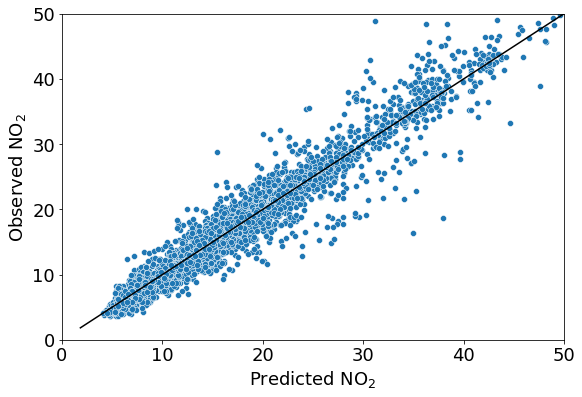

In [ ]:
fig = plt.figure(figsize=(9,6))
forest_out_no2 = forest_grid_no2.predict(X_test_NO2)
pred_summary(forest_out_no2, y_test_NO2, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [ ]:
FI_rf = pd.DataFrame(forest_grid_no2.best_estimator_.feature_importances_, index=X_train_NO2.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf

Feature Importance (RF)
closest_highway                       0.301239
road_type_motorway                    0.163318
wind                                  0.119125
temp                                  0.055476
road_type_residential                 0.054761
zone_residential                      0.049737
pop_den                               0.048283
stop_sign_dist                        0.047529
closest_primary                       0.041135
closest_secondary                     0.034240
closest_tertiary                      0.032809
trafic_signal_dist                    0.029205
zone_industrial                       0.007215
zone_commercial                       0.005591
zone_mixed                            0.003818
road_type_secondary                   0.003299
road_type_tertiary                    0.001620
road_type_primary                     0.001450
zone_open_space                       0.000149

### ensemble learning - Boosting

In [ ]:
# Use the same random forest gridsearch as above
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_no2 = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_no2.fit(X_train_NO2, y_train_NO2)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_no2.best_score_)))
print(gb_forest_grid_no2.best_estimator_)

Best score (RMSE) 2.9641789473151485
GradientBoostingRegressor(learning_rate=0.5, max_features=6, n_estimators=200)


RMSE 2.8155950273865638
R2 0.9023268745695645


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO$_2$')

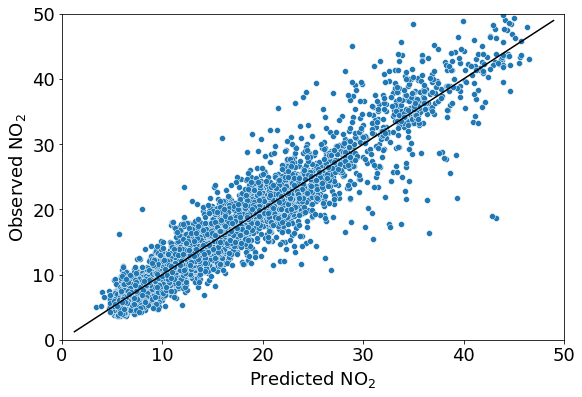

In [ ]:
fig = plt.figure(figsize=(9,6))
gb_forest_out_no2 = gb_forest_grid_no2.predict(X_test_NO2)
pred_summary(gb_forest_out_no2, y_test_NO2, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [ ]:
FI_gb = pd.DataFrame(gb_forest_grid_no2.best_estimator_.feature_importances_, index=X_train_NO2.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb

Feature Importance (GB)
road_type_motorway                    0.374898
closest_highway                       0.168217
wind                                  0.160970
temp                                  0.061731
pop_den                               0.041917
stop_sign_dist                        0.033465
closest_primary                       0.032315
zone_residential                      0.027109
closest_tertiary                      0.022200
trafic_signal_dist                    0.021423
closest_secondary                     0.020815
road_type_residential                 0.018002
zone_mixed                            0.007502
zone_industrial                       0.003640
road_type_secondary                   0.002613
zone_commercial                       0.001996
road_type_primary                     0.000793
zone_open_space                       0.000204
road_type_tertiary                    0.000188

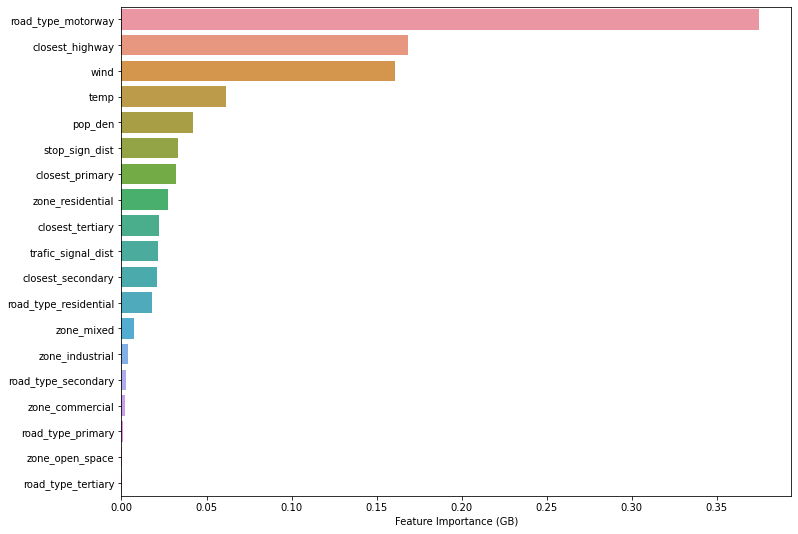

In [ ]:
g2 = sns.barplot(x="Feature Importance (GB)", y=FI_gb.index, data=FI_gb)
g2.figure.set_size_inches(12, 9)

### permutation Importance

In [ ]:
# (1) Set the best parameters from hyperparameter tuning
grid_search_best_no2 = forest_grid_no2.best_estimator_
print('Parameters currently in use:\n')
pprint(grid_search_best_no2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# (2) Permutation Importance - Random Forest
PI_no2 = permutation_importance(grid_search_best_no2, X_test_NO2, y_test_NO2, n_repeats=5, random_state=1)



PI_res = pd.DataFrame(data=np.transpose([PI_no2['importances_mean'],PI_no2['importances_std']]), 
             index = X_test_NO2.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)
PI_res

PI_mean    PI_std
closest_highway        0.485292  0.008089
wind                   0.221344  0.004559
road_type_motorway     0.112383  0.002685
temp                   0.071276  0.003730
closest_primary        0.051202  0.000926
stop_sign_dist         0.047895  0.001626
pop_den                0.047523  0.001904
closest_secondary      0.040684  0.002004
road_type_residential  0.031065  0.000853
zone_residential       0.027221  0.000722
closest_tertiary       0.025662  0.001305
trafic_signal_dist     0.022439  0.000893
zone_industrial        0.004997  0.000279
zone_mixed             0.004277  0.000189
zone_commercial        0.004042  0.000215
road_type_secondary    0.001404  0.000150
road_type_primary      0.000560  0.000021
road_type_tertiary     0.000306  0.000044
zone_open_space       -0.000032  0.000009

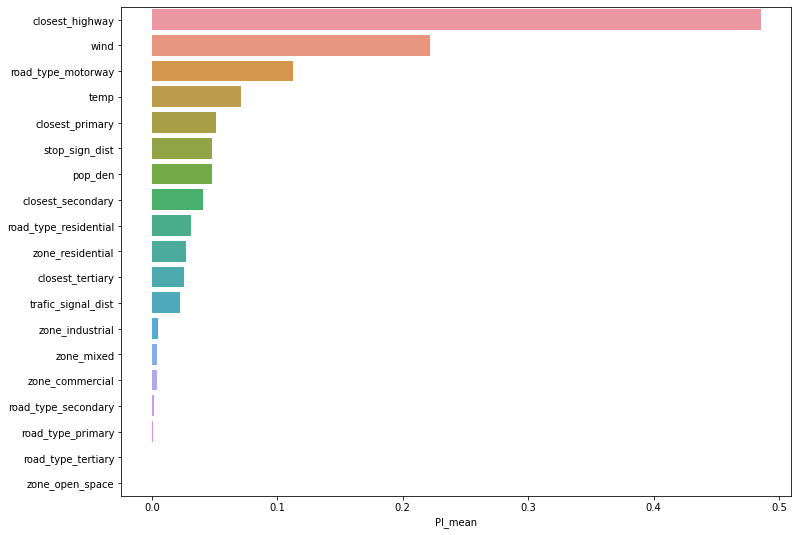

In [ ]:
g1 = sns.barplot(x="PI_mean", y=PI_res.index, data=PI_res)
g1.figure.set_size_inches(12, 9)

### result summary

In [ ]:
# Summary

summary_0 = pd.DataFrame({'Random Forest':list(FI_rf.index),
              'Gradient Boost':list(FI_gb.index),
               'Permutation Importance':list(PI_res.index)})
summary_0

Random Forest         Gradient Boost Permutation Importance
0         closest_highway     road_type_motorway        closest_highway
1      road_type_motorway        closest_highway                   wind
2                    wind                   wind     road_type_motorway
3                    temp                   temp                   temp
4   road_type_residential                pop_den        closest_primary
5        zone_residential         stop_sign_dist         stop_sign_dist
6                 pop_den        closest_primary                pop_den
7          stop_sign_dist       zone_residential      closest_secondary
8         closest_primary       closest_tertiary  road_type_residential
9       closest_secondary     trafic_signal_dist       zone_residential
10       closest_tertiary      closest_secondary       closest_tertiary
11     trafic_signal_dist  road_type_residential     trafic_signal_dist
12        zone_industrial             zone_mixed        zone_industrial
13        zone_commercial        zone_industrial             zone_mixed
14             zone_mixed    road_type_secondary        zone_commercial
15    road_type_secondary        zone_commercial    road_type_secondary
16     road_type_tertiary      road_type_primary      road_type_primary
17      road_type_primary        zone_open_space     road_type_tertiary
18        zone_open_space     road_type_tertiary        zone_open_space

## NO (HW)

### Ensemble learning - Bagging

In [ ]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid.fit(X_train_NO, y_train_NO)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid.best_score_)))
print(forest_grid.best_estimator_)

Best score (RMSE) 6.34459712882915
RandomForestRegressor(max_features=10, n_estimators=150, n_jobs=2)


RMSE 5.791346342706906
R2 0.9211563896528333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed NO')

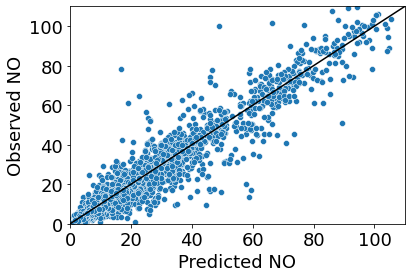

In [ ]:
forest_NO = forest_grid.predict(X_test_NO)
pred_summary(forest_NO, y_test_NO, limit=110)
plt.xlabel('Predicted NO', fontsize = 18); plt.ylabel('Observed NO', fontsize=18)

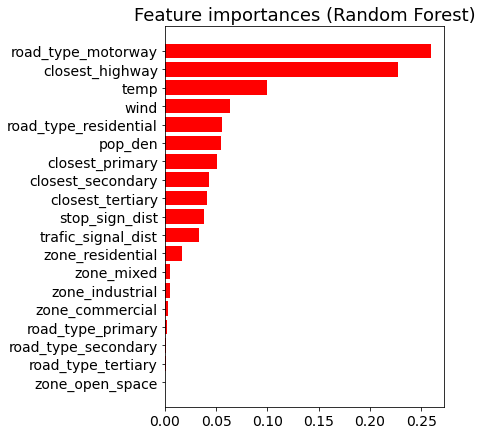

In [ ]:
features = X_train_NO.columns
importance = forest_grid.best_estimator_.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(5, 7))
plt.title("Feature importances (Random Forest)", fontsize = 18)
plt.barh(features[indices], importance[indices],
       color="r",  align="center")
plt.tick_params(labelsize=14);

### Ensemble learning - Boosting 

### permutation importance

### result summary

## PM2.5 (HW)

### Ensemble learning - Bagging

In [ ]:
# Use the same random forest gridsearch as above
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200, 250]}

forest_grid_pm = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_pm.fit(X_train_PM, y_train_PM)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_pm.best_score_)))
print(forest_grid_pm.best_estimator_)

Best score (RMSE) 1.4086381812846978
RandomForestRegressor(max_features=10, n_estimators=200, n_jobs=2)


RMSE 1.3405682521128925
R2 0.8475965901857361


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Observed PM')

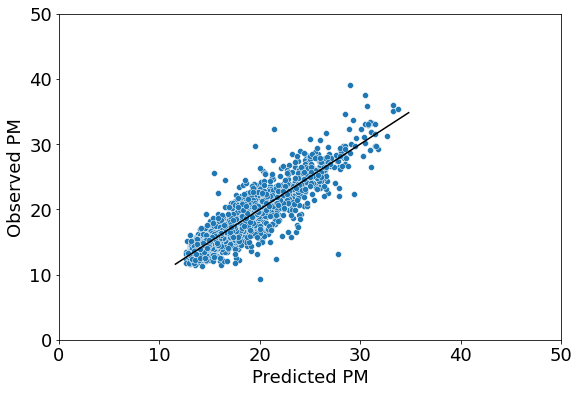

In [ ]:
fig = plt.figure(figsize=(9,6))
forest_out_pm = forest_grid_pm.predict(X_test_PM)
pred_summary(forest_out_pm, y_test_PM, limit=50)
plt.xlabel('Predicted PM', fontsize = 18); plt.ylabel('Observed PM', fontsize=18)

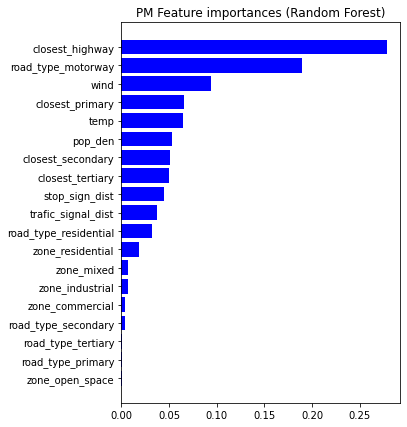

In [ ]:
features = X.columns
importance = forest_grid_pm.best_estimator_.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(5, 7))
plt.title("PM Feature importances (Random Forest)")
plt.barh(features[indices], importance[indices],
       color="b",  align="center");

### Ensemble learning - Boosting 

### permutation importance

### result summary